# EC2202 Graphs (3)

**Disclaimer.**
This code examples are based on 
1. [LeetCode](https://leetcode.com/)
2. [GeeksForGeeks](https://practice.geeksforgeeks.org/)
3. Coding Interviews

In [ ]:
import doctest

## Minimum sapnning trees

### Kruskal's algorithm

In [ ]:
def mst_kruskal(G):
  mst = []
  ds = DisjointSets(N)
  G.sort(key=lambda t: t[2])  # ascending order
  mst_cost = 0
  while len(mst) < N - 1:
    u, v, val = G.pop(0)
    if not ds.connected(u, v):
      ds.union(u, v)
      mst.append((u, v))
      mst_cost += val

#### 'ppp' exercise

You are given an array points representing integer coordinates of some points on a 2D-plane, where `points[i] = [xi, yi]`.

The cost of connecting two points `[xi, yi]` and `[xj, yj]` is the manhattan distance between them: `|xi - xj| + |yi - yj|`, where `|val|` denotes the absolute value of `val`.

Return the minimum cost to make all points connected. All points are connected if there is exactly one simple path between any two points.

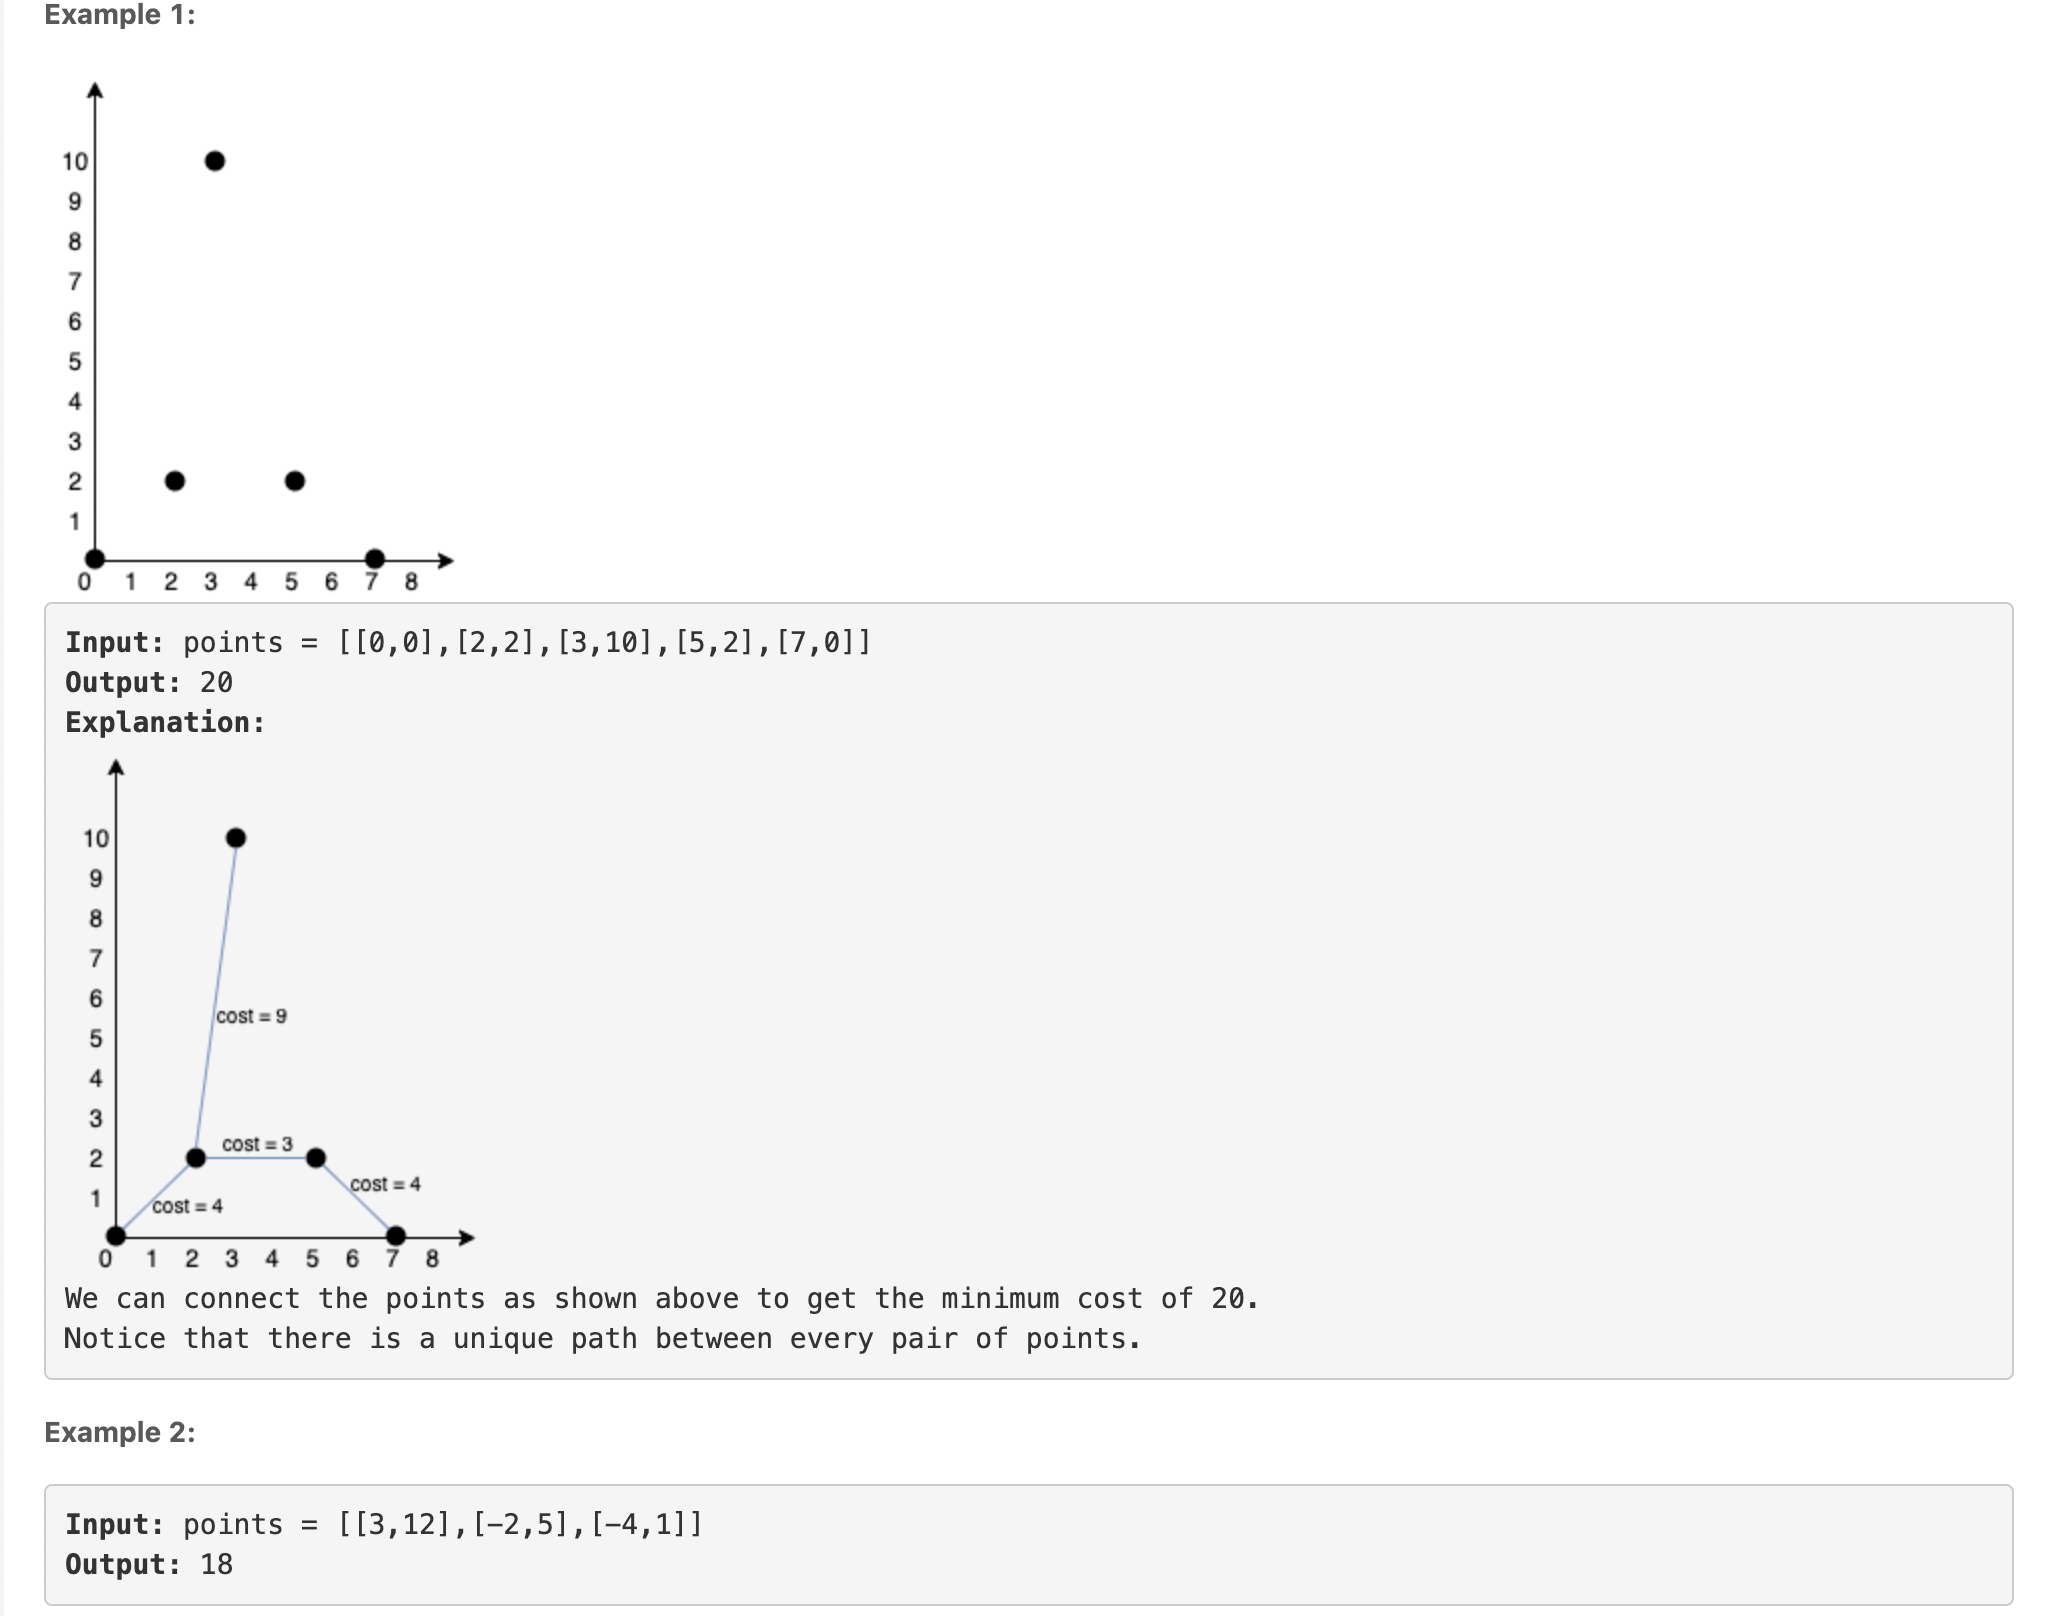

In [ ]:
def min_cost_connection(points):
  '''
  >>> min_cost_connection([[0,0],[2,2],[3,10],[5,2],[7,0]])
  20
  >>> min_cost_connection([[3,12],[-2,5],[-4,1]])
  18
  '''
  # ** hint 1 **
  #    Connect each pair of points with a weighted edge,
  #    the weight being the manhattan distance between those points.

  # ** hint 2 **
  #    The problem is now the cost of minimum spanning tree
  #    in graph with above edges.

  # ** hint 3 **
  #    Use the edge class provided to convert the problem
  #    as minimum spanning tree

  # ** hint 4 **
  #    Use the heap data structure to sort out the edges
  #    - heap.heapify(a_list_of_items)
  #    - heap.heappop(a_list_of_items)
  
  if not points or len(points) == 0:
    return 0
  size = len(points)
  pq = []  # priority queue
  ds = DisjointSets(size)

  for i in range(size):
    x1, y1 = points[i]
    for j in range(i + 1, size):
      x2, y2 = points[j]
      # Calculate the distance between two coordinates.
      cost = abs(x1 - x2) + abs(y1 - y2)
      edge = Edge(i, j, cost)
      pq.append(edge)
  
  # Convert pq into a heap.
  heapq.heapify(pq)

  result = 0
  count = size - 1
  while pq and count > 0:
    edge = heapq.heappop(pq)
    if not ds.connected(edge.point1, edge.point2):
      ds.union(edge.point1, edge.point2)
      result += edge.cost
      count -= 1
  return result

class Edge:
  def __init__(self, point1, point2, cost):
    self.point1 = point1
    self.point2 = point2
    self.cost = cost

  def __lt__(self, other):
    return self.cost < other.cost

### Prim's algorithm

In [ ]:
def mst_prim(G, s):  # G: graph, s: starting vertex
  # key: weight
  # pi: parent of vertex i in MST
  # visited: whether visited vertex i
  INF = 10e100
  N = number of vertices
  key, pi, visited = [INF] * N, [None] * N, [False] * N 
  key[s] = 0  # initialize the weight of the starting point as 0

  for _ in range(N):  # repeat N (the number of vertices) times
    min_index = -1
    min_key = INF
    for i in range(N):  # min weight among not visited
      if not visited[i] and key[i] < min_key:
        min_index, min_key = i, key[i]
    visited[min_index] = True
    
    # neighbors of the selected vertex
    for v, val in G[min_index]:
      if not visited[v] and val < key[v]:
        key[v], pi[v] = val, min_index

## Shortest paths

### Dijkstra’s algorithm

In [ ]:
def Dijkstra(G, s):  # G: graph, s: starting vertex
  # D: store the minimum distance
  # P: store parent to recover the path
  D, P, visited = [INF] * N, [None] * N, [False] * N
  D[s] = 0

  for _ in range(N):
    min_index, min_val = -1, INF
    for i in range(N):
      if not visited[i] and D[i] < min_val:
        min_index, min_val = i, D[i]
    visited[min_index] = True
    for v, val in G[min_index]:
      if not visited[v] and D[min_index] + val < D[v]:
        D[v], P[v] = D[min_index] + val, min_index